## Task 1 - Data Acquistion and Preparation

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import sys
# Data Visulasation package
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
# import scikit-learn package
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

### Task 1.1 Read Data or Data Loading

###### Breast Cancer Data read .data format convert to .csv

The Breast Cancer data set contain 286 rows, 9 column except the class column and 8 categorial column except class column.

In [2]:
# read breast cancer data 
read_file = pd.read_csv (r'breast-cancer.data', header = None)
# Assign Coulmns to dataframes
read_file.columns = ['Class','age','menopause','tumorSize','invNodes','nodeCaps','degMalig','breast','breastQuad','irradiat']
# save data to .csv in working directory
read_file.to_csv (r'breast-cancer.csv', index=None)


In [3]:
# Load data from .csv
breastCancer = pd.read_csv('breast-cancer.csv')
breastCancer #display data

,Class,age,menopause,tumorSize,invNodes,nodeCaps,degMalig,breast,breastQuad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


### Task 1.2 Data Cleaning and Preparation

In [4]:
# Data set informations
breastCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
Class         286 non-null object
age           286 non-null object
menopause     286 non-null object
tumorSize     286 non-null object
invNodes      286 non-null object
nodeCaps      286 non-null object
degMalig      286 non-null int64
breast        286 non-null object
breastQuad    286 non-null object
irradiat      286 non-null object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


In [5]:
# shape of dataset
breastCancer.shape

(286, 10)

In [6]:
# No of Distinct data in each column
breastCancer.nunique()

Class          2
age            6
menopause      3
tumorSize     11
invNodes       7
nodeCaps       3
degMalig       3
breast         2
breastQuad     6
irradiat       2
dtype: int64

In [7]:
# Dimension of dataset
breastCancer.ndim

2

###### Task 1.2.1 Checking Null Values

In [8]:
# checking null values
breastCancer.isnull().sum()
# breastCancer[breastCancer.isnull().any(axis = 1)]

Class         0
age           0
menopause     0
tumorSize     0
invNodes      0
nodeCaps      0
degMalig      0
breast        0
breastQuad    0
irradiat      0
dtype: int64

##### Task 1.2.2 Checking Duplicate Values

In [9]:
# checking duplicate values
duplicate= breastCancer[breastCancer.duplicated(keep=False)]
# sort duplicate values by age, class and tumor size
duplicate.sort_values(['age', 'Class','tumorSize'], ascending=[True, True,True])

,Class,age,menopause,tumorSize,invNodes,nodeCaps,degMalig,breast,breastQuad,irradiat
116,no-recurrence-events,30-39,premeno,15-19,0-2,no,1,left,left_low,no
171,no-recurrence-events,30-39,premeno,15-19,0-2,no,1,left,left_low,no
238,recurrence-events,30-39,premeno,35-39,0-2,no,3,left,left_low,no
268,recurrence-events,30-39,premeno,35-39,0-2,no,3,left,left_low,no
65,no-recurrence-events,40-49,premeno,10-14,0-2,no,1,right,left_up,no
113,no-recurrence-events,40-49,premeno,10-14,0-2,no,1,right,left_up,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no
112,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no
236,recurrence-events,40-49,premeno,25-29,0-2,no,2,right,left_low,no
237,recurrence-events,40-49,premeno,25-29,0-2,no,2,right,left_low,no


In the given dataset there are some records are duplicates.

In [10]:
# Drop duplicate values and keep only single records of duplicate record.
breastCancer = breastCancer.drop_duplicates()

###### Task 1.2.3 Checking Missing Values

In [11]:
print(breastCancer['Class'].unique())
print(breastCancer['age'].unique())
print(breastCancer['menopause'].unique())
print(breastCancer['tumorSize'].unique())
print(breastCancer['invNodes'].unique())
print(breastCancer['nodeCaps'].unique())
print(breastCancer['breast'].unique())
print(breastCancer['breastQuad'].unique())
print(breastCancer['irradiat'].unique())

['no-recurrence-events' 'recurrence-events']
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
['premeno' 'ge40' 'lt40']
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
['no' 'yes' '?']
['left' 'right']
['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
['no' 'yes']


The nodeCaps and breastQuad column contains missing value '/?'.

###### Replace missing value with value

In [12]:
# Replace missing value('/?') of column nodeCaps to missing
breastCancer['nodeCaps'].mask(breastCancer['nodeCaps'] == '?', 'missing', inplace=True)
# Replace missing value('/?') of column breastQuad to missing
breastCancer['breastQuad'].mask(breastCancer['breastQuad'] == '?', 'missing', inplace=True)

## Task 2 - Data Exploration

### Task 2.1 Each column descriptive Statitics and Visualisations

#### Task 2.1.1 Each Column Descriptive Statitics

In [13]:
# Statics of each column in dataset
breastCancer.describe(include=np.object)
# After drop duplicates new column count is 272

,Class,age,menopause,tumorSize,invNodes,nodeCaps,breast,breastQuad,irradiat
count,272,272,272,272,272,272,272,272,272
unique,2,6,3,11,7,3,2,6,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,left,left_low,no
freq,191,91,143,60,200,209,143,103,205


#### Task 2.1.2 Cancer Dataset every column Visualisations

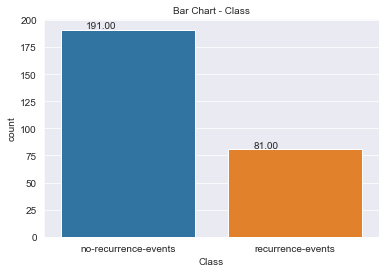

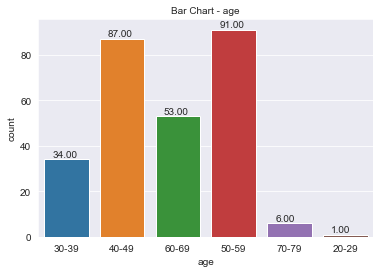

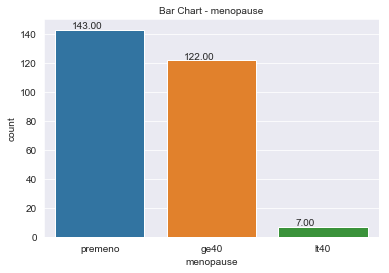

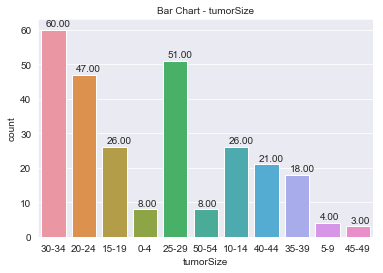

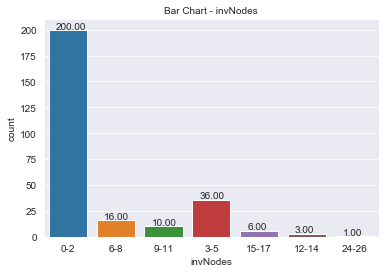

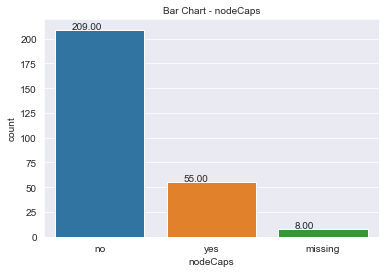

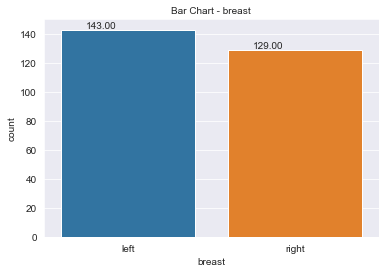

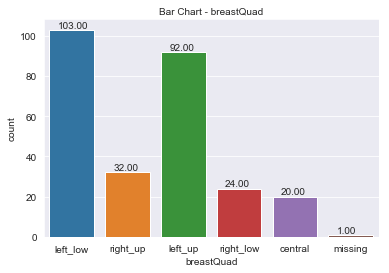

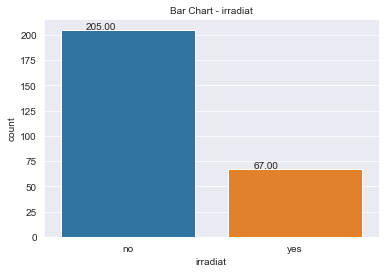

In [14]:
# Create for loop for each categrocial column draw count bar chart 
for column in breastCancer.dtypes[breastCancer.dtypes == 'object'].index:
    # Seaborn count plot for each column
    ax=sns.countplot(x=breastCancer[column])
    # set the title to count plot
    ax.set_title('Bar Chart - {}'.format(column), fontsize=10)
    # Assign the value to bar graph or count chart
    for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    # Display Count Bar chart
    plt.show()

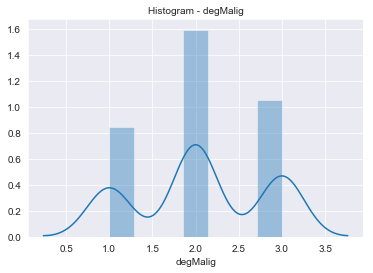

In [15]:
# Create histogram for DegMalig Column
ax = sns.distplot(breastCancer['degMalig'], hist=True)
# set the title to histogram
ax.set_title('Histogram - degMalig', fontsize=10)
# Display histogram
plt.show()

### Task 2.2 Relationships between columns

##### convert string categorical data into numeric

In [16]:
# Class categorical data to numeric: 'no-recurrence-events':0 and 'recurrence-events':1
def score_to_class(x):
    if x=='no-recurrence-events':
        return 0
    if x=='recurrence-events':
        return 1

# Age range categorical data to mean or avg value of range in numeric: '20-29':24.5,'30-39':34.5,'40-49':44.5,'50-59':54.5,'60-69':64.5,'70-79':74.5
def score_to_age(x):
    if x=='20-29':
        return 24.5
    if x=='30-39':
        return 34.5
    if x=='40-49':
        return 44.5
    if x=='50-59':
        return 54.5
    if x=='60-69':
        return 64.5
    if x=='70-79':
        return 74.5

# Menopause categorical data to numeric: 'premeno':1,'ge40':2,'lt40':3
def score_to_menopause(x):
    if x=='premeno':
        return 1
    if x=='ge40':
        return 2
    if x=='lt40':
        return 3
    
# TumorSize range categorical data to mean or avg value of range in numeric: 
# '0-4':2,'5-9':7,'10-14':12,'15-19':17,'20-24':22,'25-29':27, '30-34':32,'35-39':37,'40-44':42,'45-49':47,'50-54':52
def score_to_tumorSize(x):
    if x=='0-4':
        return 2
    if x=='5-9':
        return 7
    if x=='10-14':
        return 12
    if x=='15-19':
        return 17
    if x=='20-24':
        return 22
    if x=='25-29':
        return 27
    if x=='30-34':
        return 32
    if x=='35-39':
        return 37
    if x=='40-44':
        return 42
    if x=='45-49':
        return 47
    if x=='50-54' :
        return 52   

# InvNodes range categorical data to mean or avg value of range in numeric: 
# '0-2':1,'3-5':4,'6-8':7,'9-11':10,'12-14':13,'15-17':16,'24-26':19
def score_to_invNodes(x):
    if x=='0-2':
        return 1
    if x=='3-5':
        return 4
    if x=='6-8':
        return 7
    if x=='9-11':
        return 10
    if x=='12-14':
        return 13
    if x=='15-17':
        return 16
    if x=='24-26':
        return 19

# NodeCaps categorical data to numeric: 'no':0,'yes':1,'missing':2
def score_to_nodeCaps(x):
    if x=='no':
        return 0
    if x=='yes':
        return 1
    if x=='missing':
        return 2

# Breast categorical data to numeric: 'left':1,'right':2
def score_to_breast(x):
    if x=='left' :
        return 1
    if x=='right':
        return 2

# BreastQuad categorical data to numeric: 'left_up': 1, 'left_low':2, 'right_up':3, 'right_low':4, 'central':5, 'missing':6
def score_to_breastQuad(x):
    if x=='left_up' :
        return 1
    if x=='left_low':
        return 2
    if x=='right_up' :
        return 3
    if x=='right_low':
        return 4
    if x=='central':
        return 5
    if x=='missing':
        return 6

# Irradiat categorical data to numeric: 'no':0,'yes':1
def score_to_irradiat(x):
    if x=='no':
        return 0
    if x=='yes':
        return 1

# Apply the function to the score variable
breastCancer['Class'] = breastCancer['Class'].apply(score_to_class)
breastCancer['age'] = breastCancer['age'].apply(score_to_age)
breastCancer['menopause'] = breastCancer['menopause'].apply(score_to_menopause)
breastCancer['tumorSize'] = breastCancer['tumorSize'].apply(score_to_tumorSize)
breastCancer['invNodes'] = breastCancer['invNodes'].apply(score_to_invNodes)
breastCancer['nodeCaps'] = breastCancer['nodeCaps'].apply(score_to_nodeCaps)
breastCancer['breast'] = breastCancer['breast'].apply(score_to_breast)
breastCancer['breastQuad'] = breastCancer['breastQuad'].apply(score_to_breastQuad)
breastCancer['irradiat'] = breastCancer['irradiat'].apply(score_to_irradiat)
# Display Converted data
breastCancer

,Class,age,menopause,tumorSize,invNodes,nodeCaps,degMalig,breast,breastQuad,irradiat
0,0,34.5,1,32,1,0,3,1,2,0
1,0,44.5,1,22,1,0,2,2,3,0
2,0,44.5,1,22,1,0,2,1,2,0
3,0,64.5,2,17,1,0,2,2,1,0
4,0,44.5,1,2,1,0,2,2,4,0
5,0,64.5,2,17,1,0,2,1,2,0
6,0,54.5,1,27,1,0,2,1,2,0
7,0,64.5,2,22,1,0,1,1,2,0
8,0,44.5,1,52,1,0,2,1,2,0
9,0,44.5,1,22,1,0,2,2,1,0


####  Descriptive statics of data set

In [17]:
# Descriptive Statics of all column of dataset
breastCancer.describe(include='all')

,Class,age,menopause,tumorSize,invNodes,nodeCaps,degMalig,breast,breastQuad,irradiat
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,0.297794,51.080882,1.500000,26.595588,2.610294,0.261029,2.058824,1.474265,2.191176,0.246324
std,0.458131,10.113784,0.550075,10.592331,3.388003,0.502638,0.736649,0.500258,1.224080,0.431663
min,0.000000,24.500000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,44.500000,1.000000,22.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000
50%,0.000000,54.500000,1.000000,27.000000,1.000000,0.000000,2.000000,1.000000,2.000000,0.000000
75%,1.000000,54.500000,2.000000,32.000000,4.000000,0.000000,3.000000,2.000000,3.000000,0.000000
max,1.000000,74.500000,3.000000,52.000000,19.000000,2.000000,3.000000,2.000000,6.000000,1.000000


#### Task 2.2.1 Each Column Visualisations

Class
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

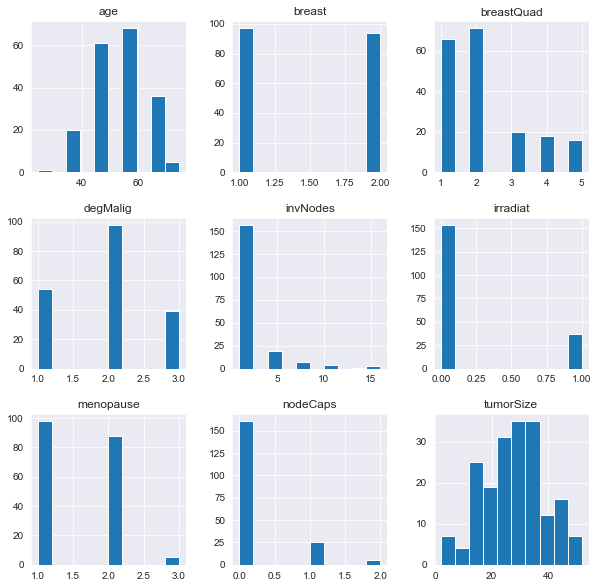

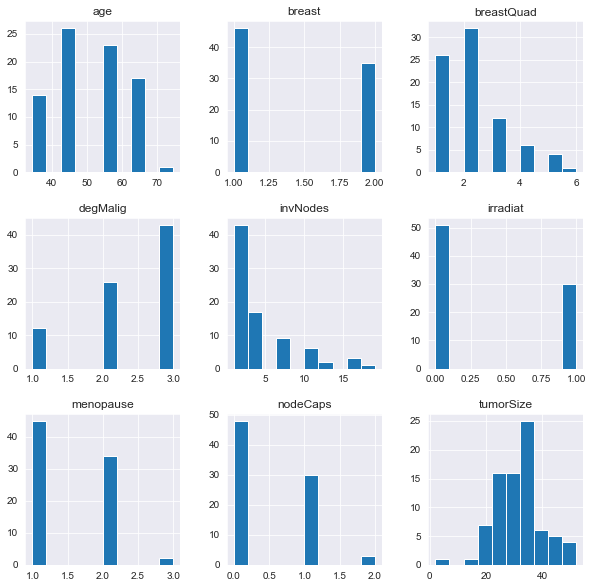

In [18]:
# data visualisation by class
breastCancer.groupby('Class').hist(figsize=(10,10),alpha=0.5)
# first list of grpahs of non recurrence events
# second list of graphs of recurrence events

#### Task 2.2.2 Correlation Matrix

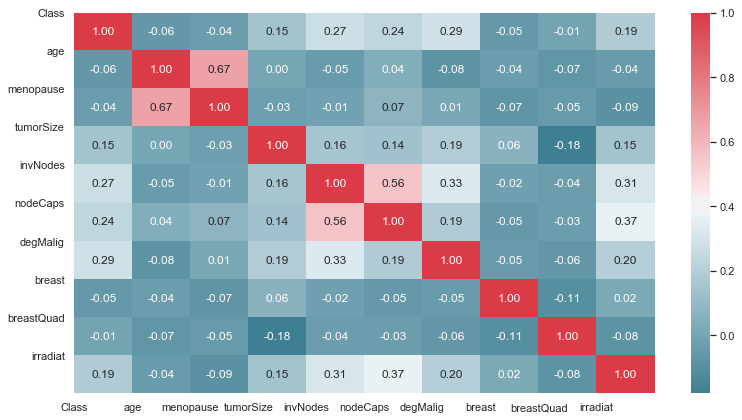

In [19]:
# Create correlation matrix on dataset
corrMatrix = breastCancer.corr()
# create seaborn notebook context
sns.set_context('notebook', rc={"lines.linewidth":2.5}, font_scale=1.0)
# Fix the figure size
plt.figure(figsize=(13,7))
# Create heat map of correlation matrix
sns.heatmap(corrMatrix, annot=True,fmt=".2f",
cmap=sns.diverging_palette(220, 10, as_cmap=True)
          )
# Mark X lables with its columns name
plt.xticks(range(len(corrMatrix.columns)), corrMatrix.columns)
# Mark y axis lables with its columns name
plt.yticks(range(len(corrMatrix.columns)), corrMatrix.columns)
# Disply the correlation matrix
plt.show()

#### Task 2.2.3 Pair Scatter Plot

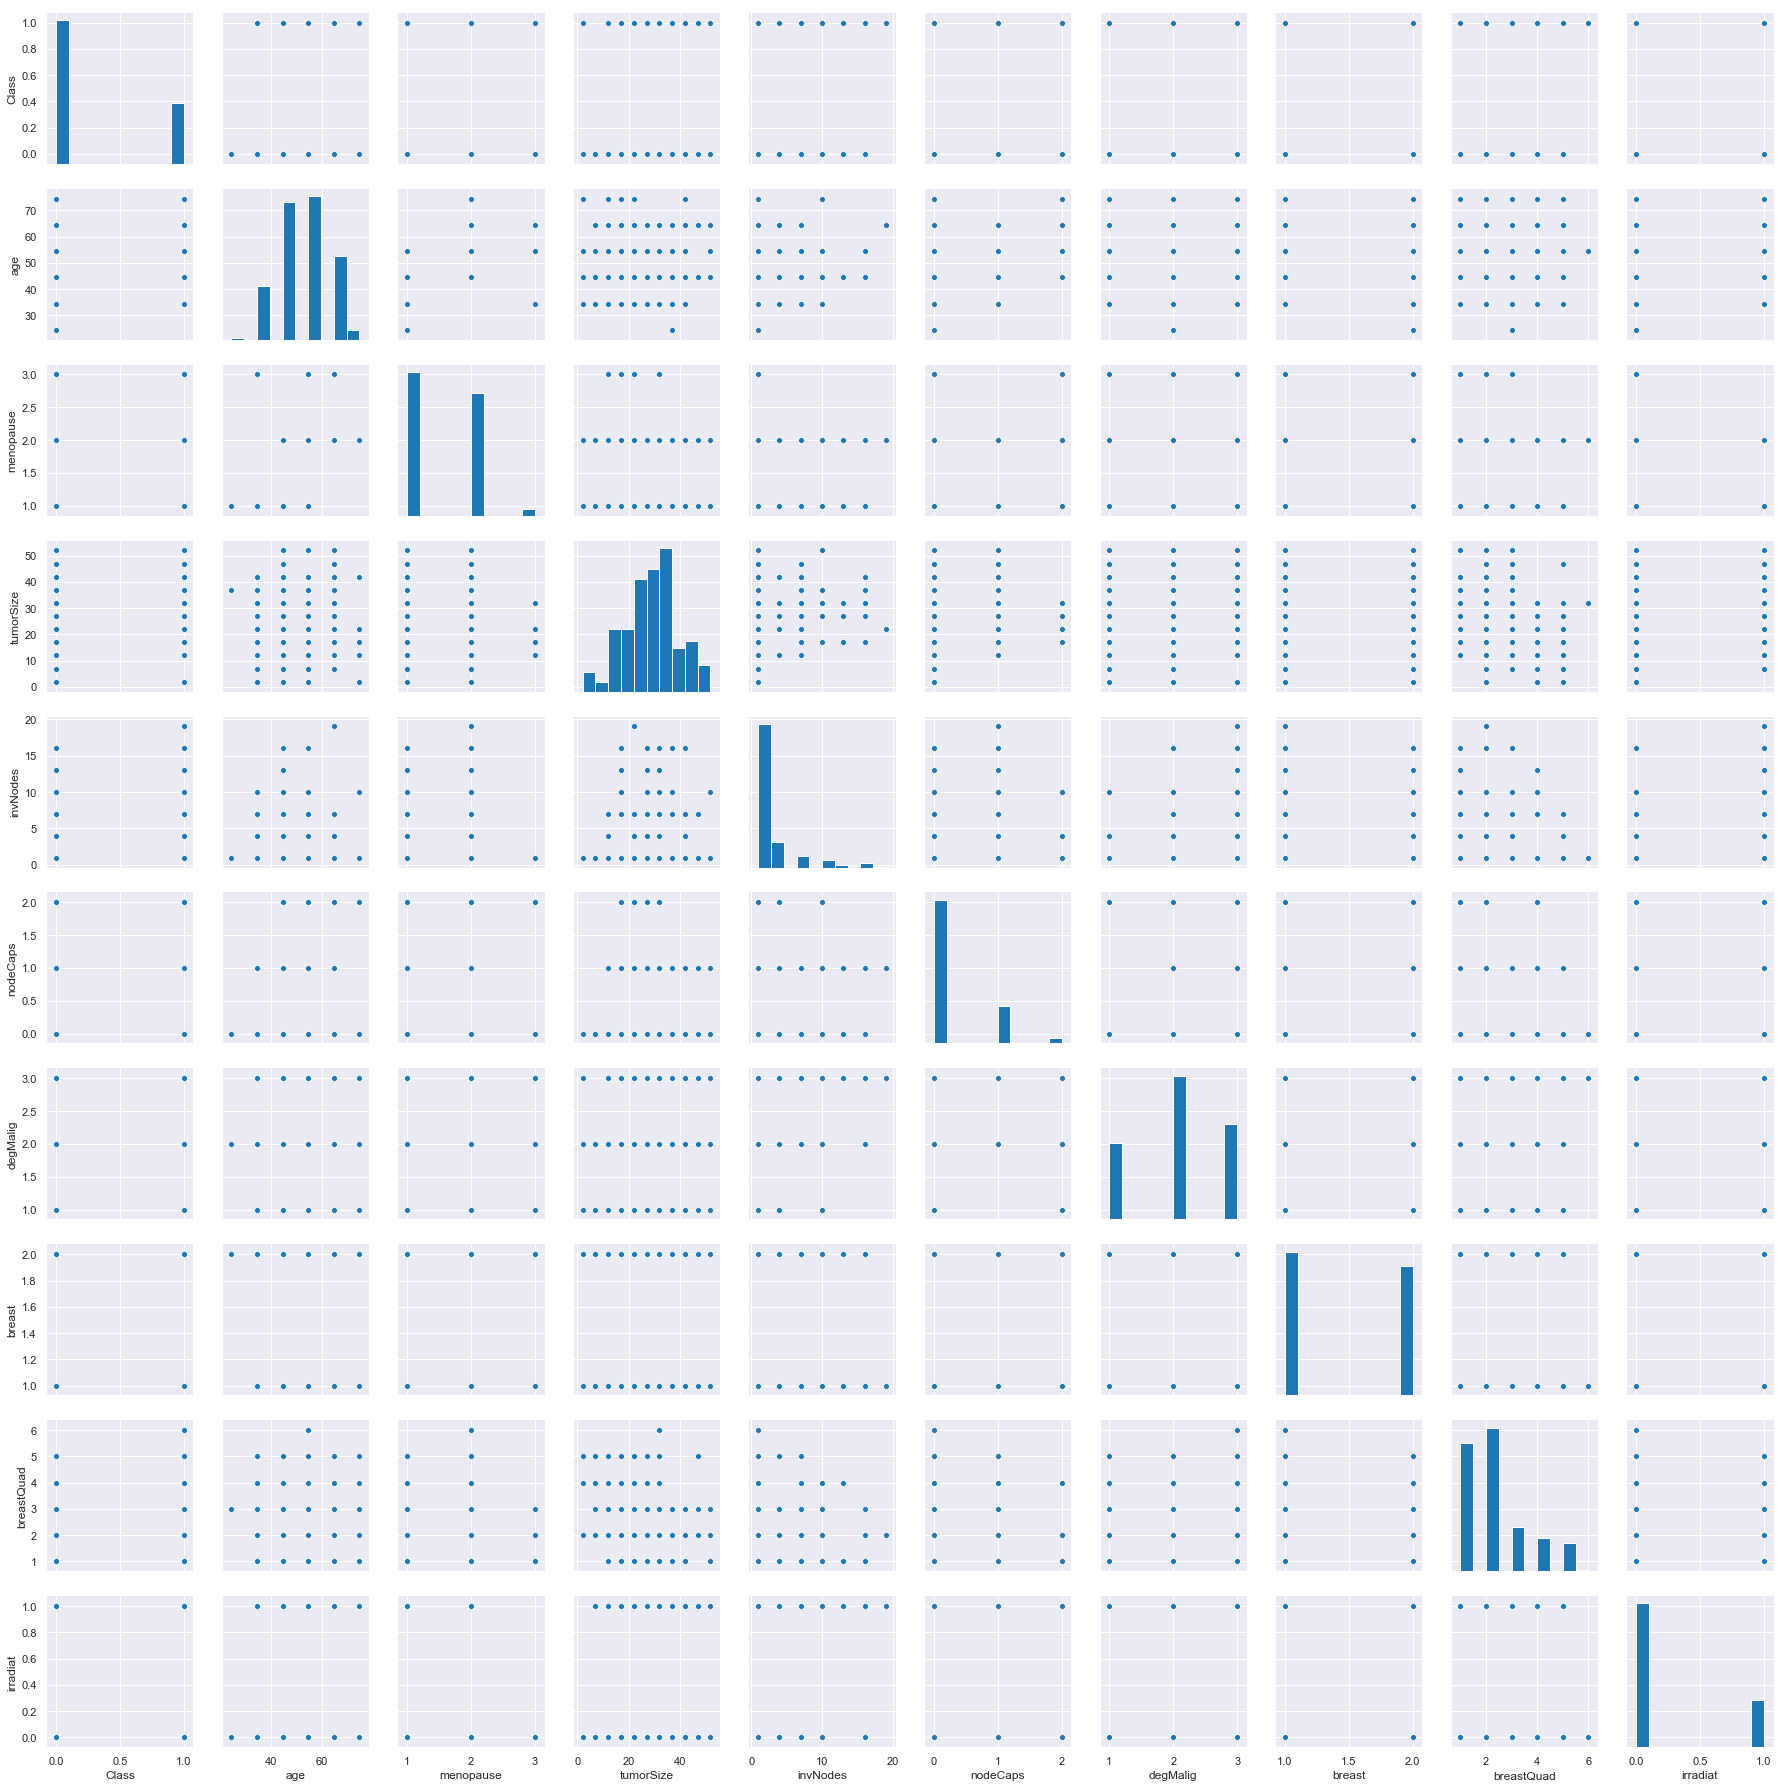

In [20]:
# Create the pair scatter plot of all columns
sns.pairplot(breastCancer)
# Display pair scatter plot
plt.show()

##### The Relationship between Age and Menopuase 

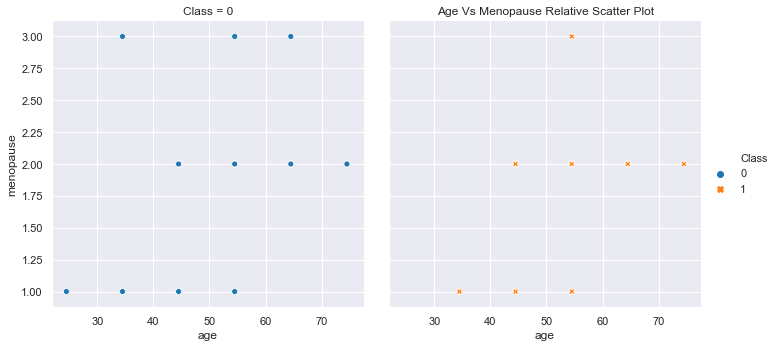

In [21]:
# Display relative scatter plot of age and menopause by its class
sns.relplot(x="age", y="menopause",col="Class", hue="Class", style="Class",kind="scatter", data=breastCancer)
# Set the title on graph
plt.title("Age Vs Menopause Relative Scatter Plot")
# Display Box plot
plt.show()

#####  The Relationship between InvNodes and NodeCaps

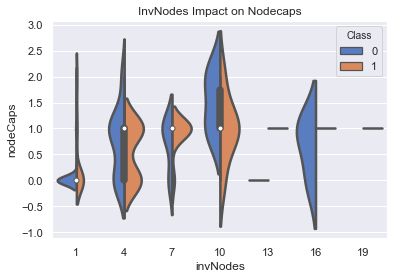

In [22]:
# Dispaly Violin plot for Invnodes and Nodecaps
sns.violinplot(x="invNodes", y="nodeCaps", hue="Class", data=breastCancer, palette="muted", split=True)
# Set the title on graph
plt.title("InvNodes Impact on Nodecaps")
# Display Box plot
plt.show()

#### The Relationship between Age and TumorSize

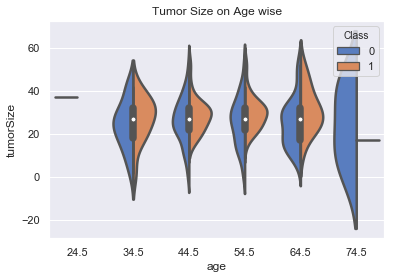

In [23]:
# Display violinplot for age and tumor size
sns.violinplot(x="age", y="tumorSize", hue="Class", data=breastCancer, palette="muted", split=True)
# Set the title on graph
plt.title("Tumor Size on Age wise")
# Display Box plot
plt.show()

#### The Relationship between Irradiat and InvNodes

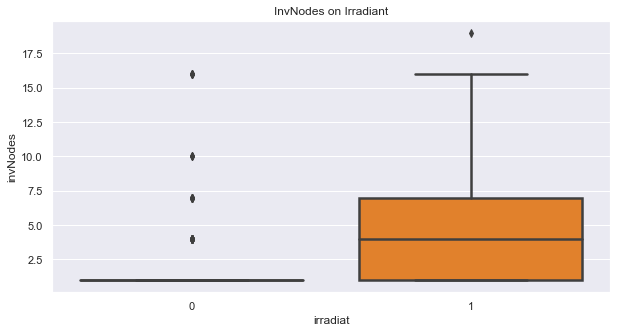

In [24]:
# set the plot figure size
plt.rcParams['figure.figsize'] = (10,5)
# Create box plot of invnode and irradiat
ax = sns.boxplot(y='invNodes',x='irradiat', data=breastCancer)
# Set the title on graph
plt.title("InvNodes on Irradiant")
# Display Box plot
plt.show()

#### The Relationship between  DegMalig and NodeCaps

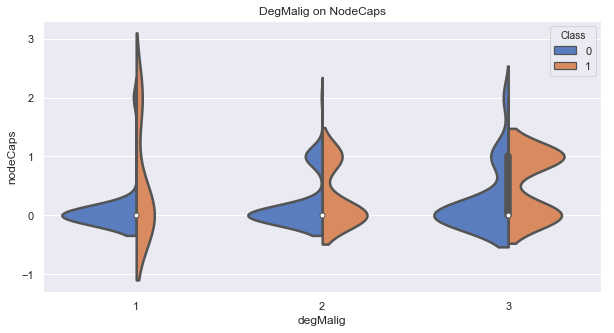

In [25]:
# Display violinplot for degMalig and nodeCaps
sns.violinplot(x="degMalig", y="nodeCaps", hue="Class", data=breastCancer, palette="muted", split=True)
# Set the title on graph
plt.title("DegMalig on NodeCaps")
# Display Box plot
plt.show()

#### The Relationship between  DegMalig and TumorSize

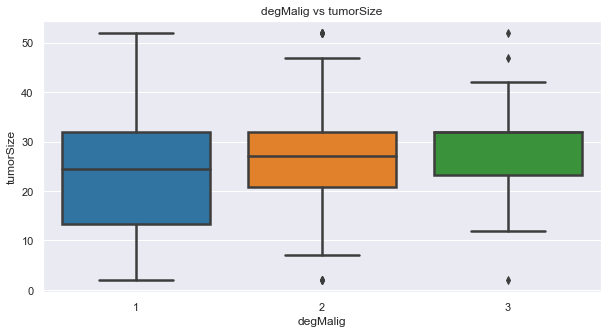

In [26]:
# set the plot figure size
plt.rcParams['figure.figsize'] = (10,5)
# Create box plot of degMalig and tumorSize
ax = sns.boxplot(x='degMalig',y='tumorSize', data=breastCancer)
# Set the title on graph
plt.title("degMalig vs tumorSize")
# Display Box plot
plt.show()

## Task 2.3 High Risk of Age for cancer

Which Age group is high risk of cancer recurrence with tumersize after radition therapy?

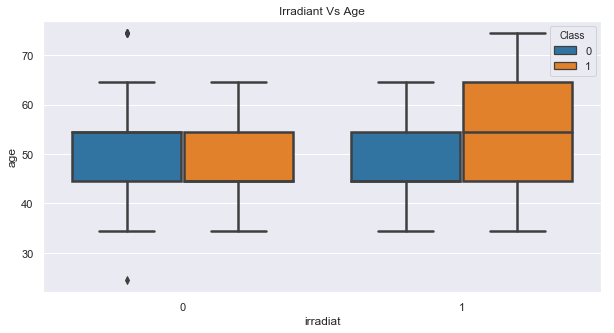

In [27]:
# set the plot figure size
plt.rcParams['figure.figsize'] = (10,5)
# Create box plot of age and irradiat
ax = sns.boxplot(y='age',x='irradiat', hue ='Class', data=breastCancer)
# Set the title on graph
plt.title("Irradiant Vs Age")
# Display Box plot
plt.show()

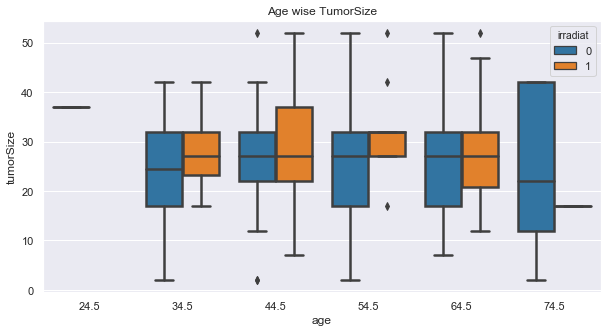

In [28]:
# set the plot figure size
plt.rcParams['figure.figsize'] = (10,5)
# Create box plot of age and tumorSize
ax = sns.boxplot(x='age',y='tumorSize', hue ='irradiat', data=breastCancer)
# Set the title on graph
plt.title("Age wise TumorSize")
# Display Box plot
plt.show()

## Task 3 Data Modelling

#### Predict the recurrence of Breast Cancer.

In [29]:
# List of column use to predict the recurrence of breast cancer risk.
recurrence_cancer_list = ['Class','age','menopause','tumorSize','invNodes','nodeCaps','degMalig','irradiat']

In [30]:
# Create data set of feture for prediction
recurrence_breast_cancer_data = breastCancer[recurrence_cancer_list]
# rename the class column to recurrence
recurrence_breast_cancer_data.rename(columns={'Class':'recurrence'}, inplace=True)
# display data
recurrence_breast_cancer_data 

,recurrence,age,menopause,tumorSize,invNodes,nodeCaps,degMalig,irradiat
0,0,34.5,1,32,1,0,3,0
1,0,44.5,1,22,1,0,2,0
2,0,44.5,1,22,1,0,2,0
3,0,64.5,2,17,1,0,2,0
4,0,44.5,1,2,1,0,2,0
5,0,64.5,2,17,1,0,2,0
6,0,54.5,1,27,1,0,2,0
7,0,64.5,2,22,1,0,1,0
8,0,44.5,1,52,1,0,2,0
9,0,44.5,1,22,1,0,2,0


#### Task 3.1 Spiliting and Training Data set

######  Create Target varible with feture data set of prediction

In [31]:
# Target Variable recurrence for prediction
Y = recurrence_breast_cancer_data.recurrence
# drop target varible from feature data
X = recurrence_breast_cancer_data.drop(['recurrence'], axis=1)

# Categorical data encoding
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

###### Splitting the dataset into the Training set and Test set Suit1, Suit 2, Suit3

In [32]:
# Suite1: 50% for training and 50% for testing
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size = 0.50, random_state = 0)
# Suite2: 60% for training and 40% for testing
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size = 0.40, random_state = 0)
# Suite3: 80% for training and 20% for testing
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X, Y, test_size = 0.20, random_state = 324)

###### Feature Scaling

In [33]:
# Scalling of feature dataset
sc = StandardScaler()
# sacle three suit feature train and test dataset
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)
X3_train = sc.fit_transform(X3_train)
X3_test = sc.transform(X3_test)

Create Data frame to strore Model evalution Result

In [34]:
# Data frame column name
COLUMN_NAMES=['Train_Test_Suit','Model','Accuracy','F1 score','Recall','Precision']
# create empty dataframe
evalution_df = pd.DataFrame(columns=COLUMN_NAMES)

### Task3.2 Model Evalution

###### Gaussian Naïve Bayes on Suit1

In [35]:
# Gaussian Naïve Bayes Model
recurrence_class = GaussianNB()
# Model Fitting
recurrence_class.fit(X1_train, Y1_train)
# Model Prediction
ModelPredictions = recurrence_class.predict(X1_test)
# Add evalution data into dictionary
data={'Train_Test_Suit': 1, # type of spiltting data suit
'Model':"GNB", # classification model Name
'Accuracy': accuracy_score(Y1_test, ModelPredictions), # Accuracy score of model
'F1 score':f1_score(Y1_test, ModelPredictions,average='weighted'), # F1 Score of model
'Recall':recall_score(Y1_test, ModelPredictions,average='weighted'), # Recall Score of model
'Precision':precision_score(Y1_test, ModelPredictions,average='weighted') # Precision of Model
     }
# save data into evalution result data frame
evalution_df = evalution_df.append(data, ignore_index=True)

print 'Suit 1 - GNB'
print 'Accuracy:', accuracy_score(Y1_test, ModelPredictions)
print 'F1 score:', f1_score(Y1_test, ModelPredictions,average='weighted')
print 'Recall:', recall_score(Y1_test, ModelPredictions,
                              average='weighted')
print 'Precision:', precision_score(Y1_test, ModelPredictions,
                                    average='weighted')

# Print Classifiction Report
print 'Clasification report:\n', classification_report(Y1_test, ModelPredictions)
# Print Confussion Matrix
print 'Confussion matrix:\n',confusion_matrix(Y1_test, ModelPredictions)

Suit 1 - GNB
Accuracy: 0.7720588235294118
F1 score: 0.754016656829956
Recall: 0.7720588235294118
Precision: 0.7596184419713832
Clasification report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        96
           1       0.68      0.42      0.52        40

   micro avg       0.77      0.77      0.77       136
   macro avg       0.74      0.67      0.69       136
weighted avg       0.76      0.77      0.75       136

Confussion matrix:
[[88  8]
 [23 17]]


###### Gaussian Naïve Bayes on Suit2

In [36]:
# Gaussian Naïve Bayes Model
recurrence_class = GaussianNB()
# Model Fitting
recurrence_class.fit(X2_train, Y2_train)
# Model Prediction
ModelPredictions = recurrence_class.predict(X2_test)
# Add evalution data into dictionary
data={'Train_Test_Suit':2,# type of spiltting data suit
'Model':"GNB", # classification model Name
'Accuracy': accuracy_score(Y2_test, ModelPredictions),# Accuracy score of model
'F1 score':f1_score(Y2_test, ModelPredictions,average='weighted'), # F1 Score of model
'Recall':recall_score(Y2_test, ModelPredictions,average='weighted'),# Recall Score of model
'Precision':precision_score(Y2_test, ModelPredictions,average='weighted')# Precision of Model
     }
# save data into evalution result data frame
evalution_df = evalution_df.append(data, ignore_index=True)

print 'Suit 2 - GNB'
print 'Accuracy:', accuracy_score(Y2_test, ModelPredictions)
print 'F1 score:', f1_score(Y2_test, ModelPredictions,average='weighted')
print 'Recall:', recall_score(Y2_test, ModelPredictions,
                              average='weighted')
print 'Precision:', precision_score(Y2_test, ModelPredictions,
                                    average='weighted')

# Print Classifiction Report
print 'Clasification report:\n', classification_report(Y2_test, ModelPredictions)
# Print Confussion Matrix
print 'Confussion matrix:\n',confusion_matrix(Y2_test, ModelPredictions)

Suit 2 - GNB
Accuracy: 0.7431192660550459
F1 score: 0.7351527116478922
Recall: 0.7431192660550459
Precision: 0.7321051192163298
Clasification report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        76
           1       0.59      0.48      0.53        33

   micro avg       0.74      0.74      0.74       109
   macro avg       0.69      0.67      0.68       109
weighted avg       0.73      0.74      0.74       109

Confussion matrix:
[[65 11]
 [17 16]]


###### Gaussian Naïve Bayes on Suit3

In [37]:
# Gaussian Naïve Bayes Model
recurrence_class = GaussianNB()
# Model Fitting
recurrence_class.fit(X3_train, Y3_train)
# Model Prediction
ModelPredictions = recurrence_class.predict(X3_test)
# Add evalution data into dictionary
data={'Train_Test_Suit':3,# type of spiltting data suit
'Model':"GNB",# classification model Name
'Accuracy': accuracy_score(Y3_test, ModelPredictions),# Accuracy score of model
'F1 score':f1_score(Y3_test, ModelPredictions,average='weighted'), # F1 Score of model
'Recall':recall_score(Y3_test, ModelPredictions,average='weighted'),# Recall Score of model
'Precision':precision_score(Y3_test, ModelPredictions,average='weighted')# Precision of Model
     }
# save data into evalution result data frame
evalution_df = evalution_df.append(data, ignore_index=True)
print 'Suit 3 - GNB'
print 'Accuracy:', accuracy_score(Y3_test, ModelPredictions)
print 'F1 score:', f1_score(Y3_test, ModelPredictions,average='weighted')
print 'Recall:', recall_score(Y3_test, ModelPredictions,
                              average='weighted')
print 'Precision:', precision_score(Y3_test, ModelPredictions,
                                    average='weighted')
# Print Classifiction Report
print 'Clasification report:\n', classification_report(Y3_test, ModelPredictions)
# Print Confussion Matrix
print 'Confussion matrix:\n',confusion_matrix(Y3_test, ModelPredictions)

Suit 3 - GNB
Accuracy: 0.7818181818181819
F1 score: 0.7818181818181819
Recall: 0.7818181818181819
Precision: 0.7818181818181819
Clasification report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.57      0.57      0.57        14

   micro avg       0.78      0.78      0.78        55
   macro avg       0.71      0.71      0.71        55
weighted avg       0.78      0.78      0.78        55

Confussion matrix:
[[35  6]
 [ 6  8]]


###### Support Vector Classification on Suit1

In [38]:
# Support Vector Classification
recurrence_class = SVC(kernel = 'linear', random_state = 0)
# Model Fitting
recurrence_class.fit(X1_train, Y1_train)
# Model Prediction
ModelPredictions = recurrence_class.predict(X1_test)
# Add evalution data into dictionary
data={'Train_Test_Suit':1,# type of spiltting data suit
'Model':"SVC",# classification model Name
'Accuracy': accuracy_score(Y1_test, ModelPredictions),# Accuracy score of model
'F1 score':f1_score(Y1_test, ModelPredictions,average='weighted'), # F1 Score of model
'Recall':recall_score(Y1_test, ModelPredictions,average='weighted'),# Recall Score of model
'Precision':precision_score(Y1_test, ModelPredictions,average='weighted')# Precision of Model
     }
# save data into evalution result data frame
evalution_df = evalution_df.append(data, ignore_index=True)
print 'Suit 1 - SVC'
print 'Accuracy:', accuracy_score(Y1_test, ModelPredictions)
print 'F1 score:', f1_score(Y1_test, ModelPredictions,average='weighted')
print 'Recall:', recall_score(Y1_test, ModelPredictions,
                              average='weighted')
print 'Precision:', precision_score(Y1_test, ModelPredictions,
                                    average='weighted')
# Print Classifiction Report
print 'Clasification report:\n', classification_report(Y1_test, ModelPredictions)
# Print Confussion Matrix
print 'Confussion matrix:\n',confusion_matrix(Y1_test, ModelPredictions)

Suit 1 - SVC
Accuracy: 0.7058823529411765
F1 score: 0.5841784989858012
Recall: 0.7058823529411765
Precision: 0.49826989619377166
Clasification report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        96
           1       0.00      0.00      0.00        40

   micro avg       0.71      0.71      0.71       136
   macro avg       0.35      0.50      0.41       136
weighted avg       0.50      0.71      0.58       136

Confussion matrix:
[[96  0]
 [40  0]]


###### Support Vector Classification on Suit2

In [39]:
# Support Vector Classification
recurrence_class = SVC(kernel = 'linear', random_state = 0)
# Model Fitting
recurrence_class.fit(X2_train, Y2_train)
# Model Prediction
ModelPredictions = recurrence_class.predict(X2_test)
# Add evalution data into dictionary
data={'Train_Test_Suit':2,# type of spiltting data suit
'Model':"SVC",# classification model Name
'Accuracy': accuracy_score(Y2_test, ModelPredictions),# Accuracy score of model
'F1 score':f1_score(Y2_test, ModelPredictions,average='weighted'), # F1 Score of model
'Recall':recall_score(Y2_test, ModelPredictions,average='weighted'),# Recall Score of model
'Precision':precision_score(Y2_test, ModelPredictions,average='weighted')# Precision of Model
     }
# save data into evalution result data frame
evalution_df = evalution_df.append(data, ignore_index=True)
print 'Suit 2 - SVC'
print 'Accuracy:', accuracy_score(Y2_test, ModelPredictions)
print 'F1 score:', f1_score(Y2_test, ModelPredictions,average='weighted')
print 'Recall:', recall_score(Y2_test, ModelPredictions,
                              average='weighted')
print 'Precision:', precision_score(Y2_test, ModelPredictions,
                                    average='weighted')
# Print Classifiction Report
print 'Clasification report:\n', classification_report(Y2_test, ModelPredictions)
# Print Confussion Matrix
print 'Confussion matrix:\n',confusion_matrix(Y2_test, ModelPredictions)

Suit 2 - SVC
Accuracy: 0.7155963302752294
F1 score: 0.638598344917857
Recall: 0.7155963302752294
Precision: 0.7027701077758974
Clasification report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.83        76
           1       0.67      0.12      0.21        33

   micro avg       0.72      0.72      0.72       109
   macro avg       0.69      0.55      0.52       109
weighted avg       0.70      0.72      0.64       109

Confussion matrix:
[[74  2]
 [29  4]]


###### Support Vector Classification on Suit3

In [40]:
# Support Vector Classification
recurrence_class = SVC(kernel = 'linear', random_state = 0)
# Model Fitting
recurrence_class.fit(X3_train, Y3_train)
# Model Prediction
ModelPredictions = recurrence_class.predict(X3_test)
# Add evalution data into dictionary
data={'Train_Test_Suit':3,# type of spiltting data suit
'Model':"SVC",# classification model Name
'Accuracy': accuracy_score(Y3_test, ModelPredictions),# Accuracy score of model
'F1 score':f1_score(Y3_test, ModelPredictions,average='weighted'), # F1 Score of model
'Recall':recall_score(Y3_test, ModelPredictions,average='weighted'),# Recall Score of model
'Precision':precision_score(Y3_test, ModelPredictions,average='weighted')# Precision of Model
     }
# save data into evalution result data frame
evalution_df = evalution_df.append(data, ignore_index=True)
print 'Suit 3 - SVC'
print 'Accuracy:', accuracy_score(Y3_test, ModelPredictions)
print 'F1 score:', f1_score(Y3_test, ModelPredictions,average='weighted')
print 'Recall:', recall_score(Y3_test, ModelPredictions,
                              average='weighted')
print 'Precision:', precision_score(Y3_test, ModelPredictions,
                                    average='weighted')
# Print Classifiction Report
print 'Clasification report:\n', classification_report(Y3_test, ModelPredictions)
# Print Confussion Matrix
print 'Confussion matrix:\n',confusion_matrix(Y3_test, ModelPredictions)

Suit 3 - SVC
Accuracy: 0.7636363636363637
F1 score: 0.7193438140806561
Recall: 0.7636363636363637
Precision: 0.7341818181818183
Clasification report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        41
           1       0.60      0.21      0.32        14

   micro avg       0.76      0.76      0.76        55
   macro avg       0.69      0.58      0.59        55
weighted avg       0.73      0.76      0.72        55

Confussion matrix:
[[39  2]
 [11  3]]


### Task 3.3 Model Result comparison

In [41]:
# Dispaly Evalution Dataframe
evalution_df

,Train_Test_Suit,Model,Accuracy,F1 score,Recall,Precision
0,1,GNB,0.772059,0.754017,0.772059,0.759618
1,2,GNB,0.743119,0.735153,0.743119,0.732105
2,3,GNB,0.781818,0.781818,0.781818,0.781818
3,1,SVC,0.705882,0.584178,0.705882,0.498270
4,2,SVC,0.715596,0.638598,0.715596,0.702770
5,3,SVC,0.763636,0.719344,0.763636,0.734182


#### Model Comparison Visualisation 

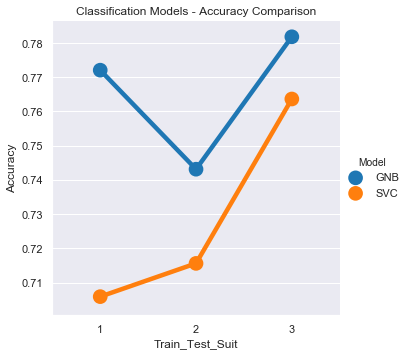

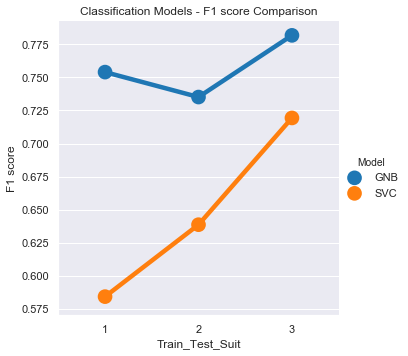

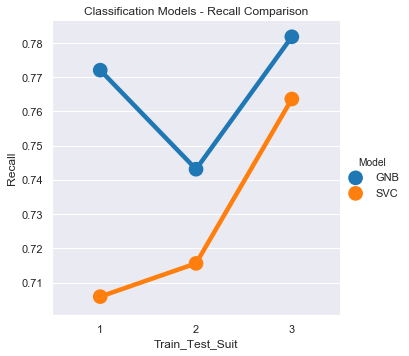

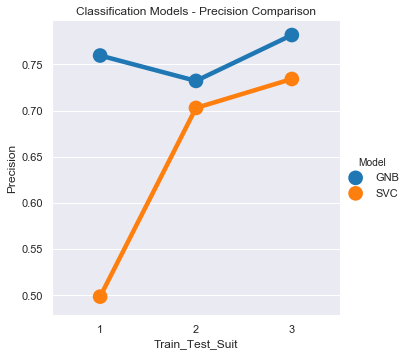

In [42]:
# Column name of evaltuin data frame
col_names = ['Accuracy','F1 score','Recall','Precision']
# create iterative loop to draw line plot of all column
for i, col_val in enumerate(col_names):
    # Factor line plot for each column
    sns.factorplot(x='Train_Test_Suit',y=col_val, hue="Model", data=evalution_df)
    # Set the title to graph
    plt.title('Classification Models - '+col_val +' Comparison')
    # Display line chart
    plt.show()